In [123]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline
import string
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import seaborn as sns; sns.set(color_codes=True)
import functions_logistic_regression_0 as run

# Objective:

The objective of this project is to classify negative and positive sentiment by way of:
1. A custom logistic regression using the Bagging method for text processing. 
2. Built-In logistic regression Model.

**The Data contains sentences labelled with positive or negative reviews, extracted from reviews of products, movies, and restaurants. The reviews on were extracted from `imdb.com`, `amazon.com`, and `yelp.com`**


A *`bag-of-words`* is a representation of text that describes the occurrence of words within a document. It involves two things:

* A vocabulary of known words.
* A measure of the presence of known words.

It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not the location of the word in the document.

https://machinelearningmastery.com/gentle-introduction-bag-words-model/


# Method 1

### Data Cleaning:

The **`sentiment`** data set consists of 3000 sentences which come from reviews on `imdb.com`, `amazon.com`, and `yelp.com`. Each sentence is labeled according to whether it comes from a positive review or negative review.

I used <font color="magenta">logistic regression</font> to learn a classifier from this data.

The text cleaning techniques used are:

* Ignoring case
* Removing Digits
* Ignoring punctuation
* Ignoring frequent words that don’t contain much information, called stop words, like “a,” “of,” etc.

The Data was download from : https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

By way of online tutorials and class notes functions where found and adjusted for the purpose of this project.



In [67]:
# Read in the data set.
with open("sentiment_labelled_sentences/full_set.txt") as f:
    content = f.readlines()

# Remove leading and trailing white space
content = [x.strip() for x in content]

#Separate the sentences from the labels
sentences = [x.split("\t")[0] for x in content]
labels = [x.split("\t")[1] for x in content]
y = np.array(labels, dtype='int8')

## full_remove takes a string x and a list of characters removal_list 
## returns x with all the characters in removal_list replaced by ' '

def full_remove(x, removal_list):
    for w in removal_list:
        x = x.replace(w, ' ')
    return x

## Remove digits
digits = [str(x) for x in range(10)]
digit_less = [full_remove(x, digits) for x in sentences]

## Remove punctuation
punc_less = [full_remove(x, list(string.punctuation)) for x in digit_less]

## Make everything lower-case
sents_lower = [x.lower() for x in punc_less]

## Define our stop words
stopwords = ['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from', "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
stop_set = set(stopwords)

## Remove stop words
sents_split = [x.split() for x in sents_lower]

sents_processed = [" ".join(list(filter(lambda a: a not in stop_set, x))) for x in sents_split]

print("This is The Processed Text Data")
sents_processed[0:10]



This is The Processed Text Data


['no way plug us unless go converter',
 'good case excellent value',
 'great jawbone',
 'tied charger conversations lasting minutes major problems',
 'mic great',
 'jiggle plug get line right get decent volume',
 'several dozen several hundred contacts imagine fun sending one one',
 'razr owner must',
 'needless say wasted money',
 'waste money time']

#### Scoring Words

The simplest scoring Method for text data (Count) was impplemented with the "CountVectorizer" function.

*`Counts Method`* :Count the number of times each word appears in a document. 

The vocabulary contains 4000 more common words. For each sentence we have a (1,4000) vector. If a word is contained in a sentence the number of times it appears on the senteced is placed on the location of the overall vocabulary.

**In this representation, each word is thought of as corresponding to a number in `{1, 2, ..., V}` where `V` is the size of our vocabulary. And each sentence is represented as a V-dimensional vector $x$, where $x_i$ is the number of times that word $i$ occurs in the sentence.*


In [68]:
from sklearn.feature_extraction.text import CountVectorizer

## Transform to bag of words representation.
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 4000)
data_features = vectorizer.fit_transform(sents_processed)

## Append '1' to the end of each vector.
p_mat = data_features.toarray()
#p_mat = X.toarray()

data_mat = np.ones((p_mat.shape[0], p_mat.shape[1]+1))
data_mat[:,:-1] = p_mat

#from sklearn.feature_extraction.text import HashingVectorizer
#vectorizer = HashingVectorizer(n_features=4500)
#X = vectorizer.fit_transform(sents_processed)
#print(X.shape)
data_mat


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Train The Model:

The data was split to have the same number of class instances for the test dataset.
* Train data has 2500 records.
* Test data has 500 records.
I decided to let the model run for 5 minutes. The ideal would be to choose minimum loss value however, to exit the while loop in the amount of time I need I created this condition.

In [69]:
## Split the data into testing and training sets
np.random.seed(0)
test_inds = np.append(np.random.choice((np.where(y==0))[0], 250, replace=False), np.random.choice((np.where(y==1))[0], 250, replace=False))
train_inds = list(set(range(len(labels))) - set(test_inds))

train_data = data_mat[train_inds,]
train_labels = y[train_inds]

test_data = data_mat[test_inds,]
test_labels = y[test_inds]

print("train data: ", train_data.shape)
print("test data: ", test_data.shape)

train data:  (2500, 4001)
test data:  (500, 4001)


In [70]:
import functions_logistic_regression_0 as run

# Random Weights Inicialized

step_size = 0.90
minimum_loss_wanted = 0.01 # only if it takes less than 5 minutes
vocabulary_size_and_bias = 4001
w = np.random.rand(vocabulary_size_and_bias)
W,P = run.gradient_descent(w,train_data,train_labels,step_size,minimum_loss_wanted,vocabulary_size_and_bias)

### Validate the Model:

With this model there is no apparent overfitting as the loss, error and accuracy for the train and test do not dramatically different.

* A 95% Accuracy is present for the training dataset.
* A 80% Accuracy is present for the test dataset.
* Printed bellow are the other metrics.

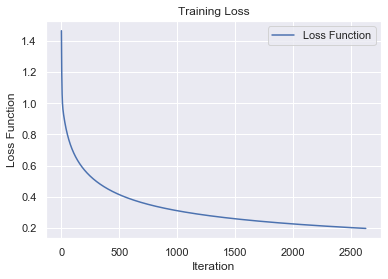

In [72]:
import seaborn as sns

plt.plot(P)
plt.title('Training Loss')
plt.xlabel("Iteration")
plt.ylabel("Loss Function")
plt.legend(['Loss Function'])
plt.show()

In [75]:
print('Train Error:',run.error(W,train_data,train_labels))
print('Train Accuracy:',run.accuracy(W,train_data,train_labels))
print('Test Error:',run.error(W,test_data,test_labels))
print('Test Accuracy:',run.accuracy(W,test_data,test_labels))
print('Train loss:',run.loss(w,train_data,train_labels))
print('Test loss:',run.loss(w,test_data,test_labels))

Train Error: 0.0448
Train Accuracy: 0.9552
Test Error: 0.196
Test Accuracy: 0.804
Train loss: 1.6054461061665486
Test loss: 1.6428549614028647


In [76]:
P = np.array(P)
print('The minimum loss happens on iteration!', np.where(P == min(P))[0][0])

The minimum loss happens on iteration! 2626


# How Strong are the Prediction of ?

In [128]:
size = len(test_labels)
preds = run.predict_proba(W,test_data,size)

In [130]:
preds[1:5]

[0.9465802762223346,
 0.9555729101401175,
 0.9323195237293578,
 0.9432871934141288]

In [126]:
gammas = np.arange(0,0.5,0.01)
counts_f = list()
for i in gammas:
    m = run.margin_counts(W, test_data, i)/500
    counts_f.append(m)

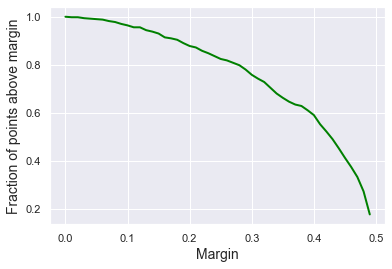

In [131]:
plt.plot(gammas, counts_f, linewidth=2, color='green')
plt.xlabel('Margin', fontsize=14)
plt.ylabel('Fraction of points above margin', fontsize=14)
plt.show()

The margin plot above shows us the following:
* 0.60 percent of the test data is predicted with a margin of > or < 0.40 ( A probability above or equal to 0.90, bellow or equal to 0.10).
* 0.20 percent of the test data is predicted with a margin of > or < 0.47 ( A probability above or equal to 0.97 below or equal 0.03).
* About 0.90 of the test data is predicted with margin > or < 0.10.

### Is the data Linearly separable?

It is impossible to visualize data with thousands of feature columns. I used PCA for representation in 2D   to Visualize the positioning of the negative and positive sentences.

* The data is not linearlly seperable.

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
%matplotlib inline

In [36]:
X_ = data_mat.copy()
y_ = y.copy()

In [37]:
X = StandardScaler().fit_transform(X_)

In [38]:
pca = PCA(n_components = 2)
principalcomp = pca.fit_transform(X)

In [39]:
principalDf = pd.DataFrame(data = principalcomp
             , columns = ['principal component 1', 'principal component 2'])

In [40]:
target_t = pd.DataFrame({'y':y_})
finalDf = pd.concat( [principalDf,target_t[['y']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,y
0,-0.162899,-0.148667,0
1,-0.149847,-0.167928,1
2,-0.137554,-0.156150,1
3,-0.169623,-0.232355,0
4,-0.132009,-0.155648,1


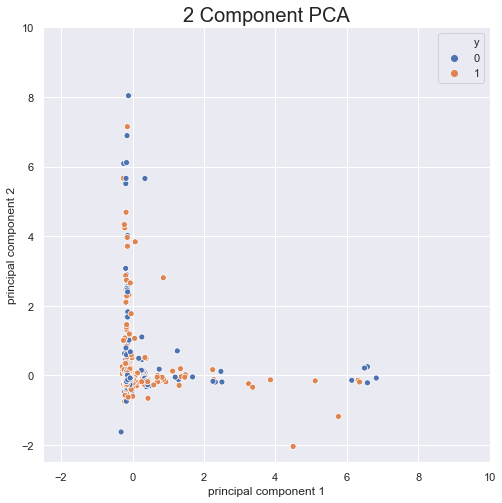

In [45]:
plt.figure(figsize = (8,8))
sns.scatterplot(
    x='principal component 1',
    y='principal component 2',
    data=finalDf,    
    hue='y'
    #size = 'y'
)
plt.xlim((-2.5,10))
plt.ylim((-2.5,10))
plt.title('2 Component PCA', fontsize = 20)

# both, hue and size are optional
sns.despine() # prettier layout

# Method 2

In [56]:
## Transform the labels from '0 v.s. 1' to '-1 v.s. 1'
y = np.array(labels, dtype='int8')
y = 2*y - 1

## Split the data into testing and training sets
np.random.seed(0)
test_inds = np.append(np.random.choice((np.where(y==-1))[0], 250, replace=False), np.random.choice((np.where(y==1))[0], 250, replace=False))
train_inds = list(set(range(len(labels))) - set(test_inds))

train_data = data_mat[train_inds,]
train_labels = y[train_inds]

test_data = data_mat[test_inds,]
test_labels = y[test_inds]

print("train data: ", train_data.shape)
print("test data: ", test_data.shape)

train data:  (2500, 4001)
test data:  (500, 4001)


In [57]:
from sklearn.linear_model import SGDClassifier

## Fit logistic classifier on training data
clf = SGDClassifier(loss="log", penalty="none")
clf.fit(train_data, train_labels)

## Pull out the parameters (w,b) of the logistic regression model
w = clf.coef_[0,:]
b = clf.intercept_

## Get predictions on training and test data
preds_train = clf.predict(train_data)
preds_test = clf.predict(test_data)

## Compute errors
errs_train = np.sum((preds_train > 0.0) != (train_labels > 0.0))
errs_test = np.sum((preds_test > 0.0) != (test_labels > 0.0))

print("Training error:", float(errs_train)/len(train_labels))
print("Test error: ", float(errs_test)/len(test_labels))

Training error: 0.0052
Test error:  0.162


# Model Comparison Given Error:

Custom Logistic Regression:
   * Train Error: 0.0448
   * Test Error: 0.196

Built-In Logistic Regression
   * Training error: 0.0052
   * Test error:  0.162

In [64]:
# Save weights and loss of custom model:
np.savetxt("Project_1_W.csv", W, delimiter=",")
np.savetxt("Project_1_Loss.csv", P, delimiter=",")